In [5]:
import pandas as pd
import os

Wczytanie danych

In [23]:
attributes = {
    'class': ['normal find', 'metastases', 'malign lymph', 'fibrosis'],
    'lymphatics': ['normal', 'arched', 'deformed', 'displaced'],
    'block of affere': ['no', 'yes'],
    'bl. of lymph. c': ['no', 'yes'],
    'bl. of lymph. s': ['no', 'yes'],
    'by pass': ['no', 'yes'],
    'extravasates': ['no', 'yes'],
    'regeneration of': ['no', 'yes'],
    'early uptake in': ['no', 'yes'],
   'lym.nodes dimin': [0, 1, 2, 3],
   'lym.nodes enlar': [1, 2, 3, 4],
   'changes in lym.': ['bean', 'oval', 'round'],
   'defect in node': ['no', 'lacunar', 'lac. marginal', 'lac. central'],
   'changes in node': ['no', 'lacunar', 'lac. margin', 'lac. central'],
   'changes in stru': ['no', 'grainy', 'drop-like', 'coarse', 'diluted', 'reticular', 'stripped', 'faint'],
   'special forms': ['no', 'chalices', 'vesicles'],
   'dislocation of': ['no', 'yes'],
   'exclusion of no': ['no', 'yes'],
   'no. of nodes in': ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '>=70']
}

In [24]:
columns = list(attributes)
cwd = os.path.abspath('')
data_numbers = pd.read_csv(fr'{cwd}\data\lymp\lymphography.csv', names = columns)

In [45]:
data = data_numbers.copy()
for attribute, vals in attributes.items():
    # print(f'{attribute}: {vals}\n{set(data[attribute].values)}\n')
    for idx, val in enumerate(vals):
        data[attribute] = data[attribute].replace(idx+1, val)


In [46]:
data.head()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,malign lymph,displaced,yes,no,no,no,no,no,yes,0,2,oval,lacunar,lac. central,faint,no,no,yes,10-19
1,metastases,deformed,yes,no,no,yes,yes,no,yes,0,3,round,lacunar,lac. margin,coarse,chalices,yes,yes,10-19
2,malign lymph,deformed,yes,yes,yes,yes,yes,yes,yes,0,4,round,lac. marginal,lac. central,faint,vesicles,yes,yes,60-69
3,malign lymph,deformed,no,no,no,no,yes,no,yes,0,3,round,lac. central,lac. central,coarse,vesicles,no,yes,50-59
4,metastases,deformed,no,no,no,no,no,no,no,0,2,oval,lac. central,lac. margin,diluted,no,yes,yes,0-9


([<matplotlib.patches.Wedge at 0x1f58cad8230>,
 [Text(-0.16284694432475802, 1.0878790708181167, 'metastases - 81 instances'),
  Text(0.023347907752630587, -1.0997521880876504, 'malign lymph - 61 instances'),
  Text(1.084177495178901, -0.1859009385334144, 'fibrosis - 4 instances'),
  Text(1.0990088614112208, -0.046685356800739694, 'normal find - 2 instances')])

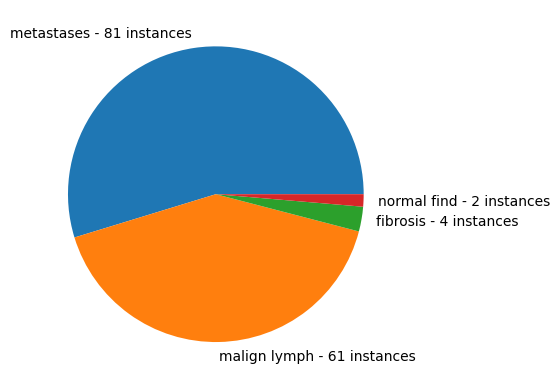

In [47]:
import matplotlib.pyplot as plt
counted = data['class'].value_counts()
names = []
numbers = []
for name, number in counted.items():
    names.append(f'{name} - {number} instances')
    numbers.append(number)
plt.pie(numbers, labels = names)


Usunięcie klas fibrosis i normal find?

Usunięcie niespójności

In [48]:
conditional_df = data.drop(columns=['class'])

In [49]:
conditional_df.duplicated().any()

False

Brak niespójności

In [53]:
for col in data.columns:
    unique_values_num = data[col].nunique()
    if unique_values_num < 2:
        print(len(unique_values_num))
        print()
    # print(f'Col {col}: {unique_values_num}- {set(list(data[col].values))}')


In [54]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
conditional_columns = [col for col in data.columns if col != 'class']
one_hot_encoded = encoder.fit_transform(data[conditional_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                            columns=encoder.get_feature_names_out(conditional_columns), 
                            index=data.index)
data_encoded = pd.concat([data.drop(conditional_columns, axis=1), one_hot_df], axis=1)

In [55]:
data_encoded.head()

,class,lymphatics_arched,lymphatics_deformed,lymphatics_displaced,lymphatics_normal,block of affere_no,block of affere_yes,bl. of lymph. c_no,bl. of lymph. c_yes,bl. of lymph. s_no,...,exclusion of no_no,exclusion of no_yes,no. of nodes in_0-9,no. of nodes in_10-19,no. of nodes in_20-29,no. of nodes in_30-39,no. of nodes in_40-49,no. of nodes in_50-59,no. of nodes in_60-69,no. of nodes in_>=70
0,malign lymph,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,metastases,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,malign lymph,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,malign lymph,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,metastases,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
len(data_encoded)

148

In [57]:
data_encoded.drop_duplicates(inplace=True)

In [58]:
len(data_encoded)

148

In [59]:
data_encoded.to_csv(fr'{cwd}\data\lymp\lymphography_preprocessed.csv', index=False)